In [2]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Step one: Processing the emissions summary for visualization</span>

In [3]:
summary1 = pd.read_csv('../../../results/Total-Emissions-Summary.csv')
summary = summary1.drop(summary1.columns[0], axis=1)
summary.index = summary.index + 1 #reorder the index to start as 1 instead of 0
summary = summary.drop(summary.index[-1])
summary

# Assuming 'condition' is the condition for selecting rows
condition = (summary['Sector'] == 'Electricity Consumption')  # Replace with your condition
# Change the values in 'Column_Name' for the selected rows
summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'electricity'
# Assuming 'condition' is the condition for selecting rows
condition = (summary['Sector'] == 'Stationary Combustion')  # Replace with your condition
# Change the values in 'Column_Name' for the selected rows
summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'buildings'

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_6784\327137140.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'electricity'
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_6784\327137140.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'buildings'


In [4]:
mobile = pd.read_csv('../../../results/Mobile-combustion-emissions.csv')
mobile = mobile['GHG Emissions(MMTCO2e)']
electric = pd.read_csv('../../../results/2021-Electricity-consumption-emissions.csv')
electric = electric['Total Emissions (MMTCO2e)']
residential_breakdowm = pd.read_csv('../../../results/residential-emissions-breakdown-fuel.csv')
residential_oil = residential_breakdowm.iloc[2,1:][::-1].reset_index(drop=True).astype(float)
residential_propane = residential_breakdowm.iloc[1,1:][::-1].reset_index(drop=True).astype(float)
residential_natural = residential_breakdowm.iloc[0,1:][::-1].reset_index(drop=True).astype(float)
residential = residential_oil+residential_propane+residential_natural
commercial = summary.loc[28:30,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential_oil+residential_propane+residential_natural+commercial+industrial
solid_waste = summary.loc[19:21,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
agriculture = pd.read_csv('../../../results/agriculture-emissions.csv')
agriculture = agriculture['GHG Emissions (MMTCO2e)']
wastewater = summary.loc[43:45,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('../../../results/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)

In [5]:
# Creating a sample DataFrame
data = {
    'MSA': ['New Haven Area', 'Hartford Area', 'Bridgeport Area'],
    'Mobile': mobile,
    'Electric': electric,
    'Stationary': stationary,
    'Solid waste': solid_waste,
    'Wastewater': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest,
}

df = pd.DataFrame(data)

# Display the created DataFrame

df.set_index('MSA', inplace=True)

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Step two: Data visualization - sector emissions</span>

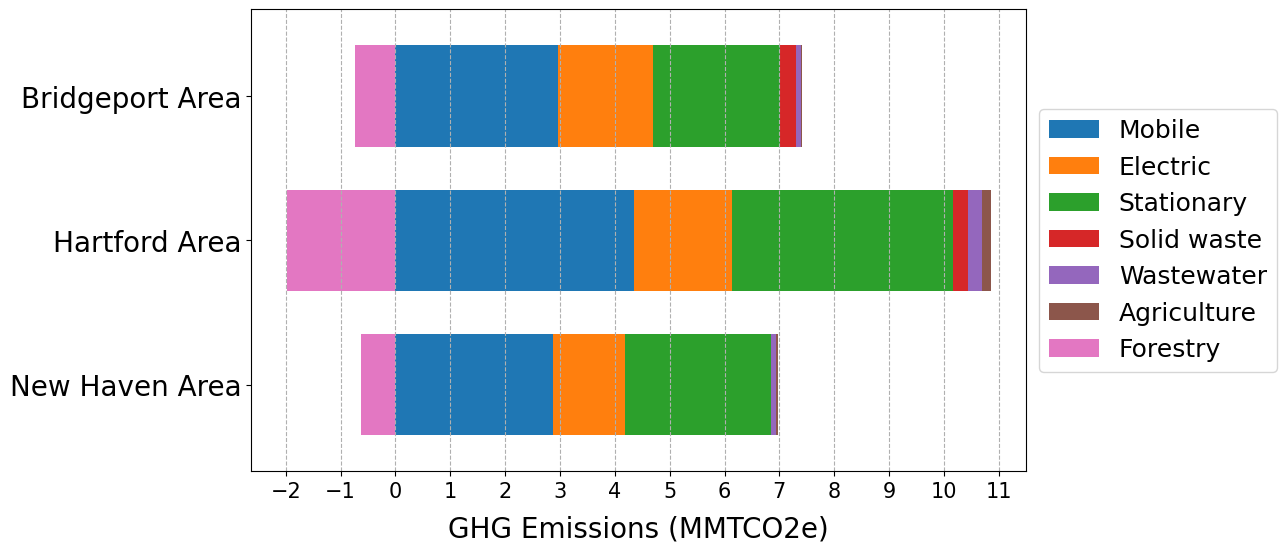

In [6]:
# Plot the DataFrame with x and y axes flipped
ax = df.plot(kind='barh', stacked=True, figsize=(10, 6),width =0.7)
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20,labelpad=10)
# Add grid
ax.grid(axis='x', linestyle='--', alpha=1)
# Remove y-axis label
ax.set_ylabel('')
# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(-2, int(df.max().max()) + 8, 1))  # Adjust the interval (5 in this case)
ax.tick_params(axis='y', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/emissions-summary.png', dpi=600, bbox_inches='tight')

In [7]:
df['Total']=df.sum(axis=1)
df

,Mobile,Electric,Stationary,Solid waste,Wastewater,Agriculture,Forestry,Total
MSA,,,,,,,,
New Haven Area,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,-0.627891,6.340842
Hartford Area,4.355344,1.790219,4.012636,0.289425,0.242241,0.170435,-1.983747,8.876553
Bridgeport Area,2.968949,1.719647,2.329686,0.290551,0.084019,0.014407,-0.737232,6.670027


In [8]:
#plot the ratio
mobile_ratio = df['Mobile']/df['Total']
#resi = df['Residential']/df['Total']
fore = df['Forestry']/df['Total']
elec = df['Electric']/df['Total']

In [9]:
#emissions per capita
mobile = pd.read_csv('../../../results/Mobile-combustion-emissions.csv')
mobile = mobile['emissions per capita (MTCO2e)']
electric = pd.read_csv('../../../results/2021-Electricity-consumption-emissions.csv')
electric =electric['Emissions per capita (MTCO2e)']
residential = summary.loc[25:27,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
commercial = summary.loc[28:30,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential+commercial+industrial
solid_waste = summary.loc[19:21,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
agriculture = pd.read_csv('../../../results/agriculture-emissions.csv')
agriculture['emissions per capita (MTCO2e)']=agriculture['GHG Emissions (MMTCO2e)']/[862127,1213123,947328]*1000000
agriculture=agriculture['emissions per capita (MTCO2e)']
wastewater = summary.loc[43:45,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('../../../results/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)/[862127,1213123,947328]*1000000

# Creating a sample DataFrame
data1 = {
    'MSA': ['New Haven Area', 'Hartford Area', 'Bridgeport Area'],
    'Mobile': mobile,
    'Electric': electric,
    'Stationary': stationary,
    'Solid waste': solid_waste,
    'Wastewater': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest,
}


df1 = pd.DataFrame(data1)
df1['Total']=df1.iloc[:, 1:].sum(axis=1)

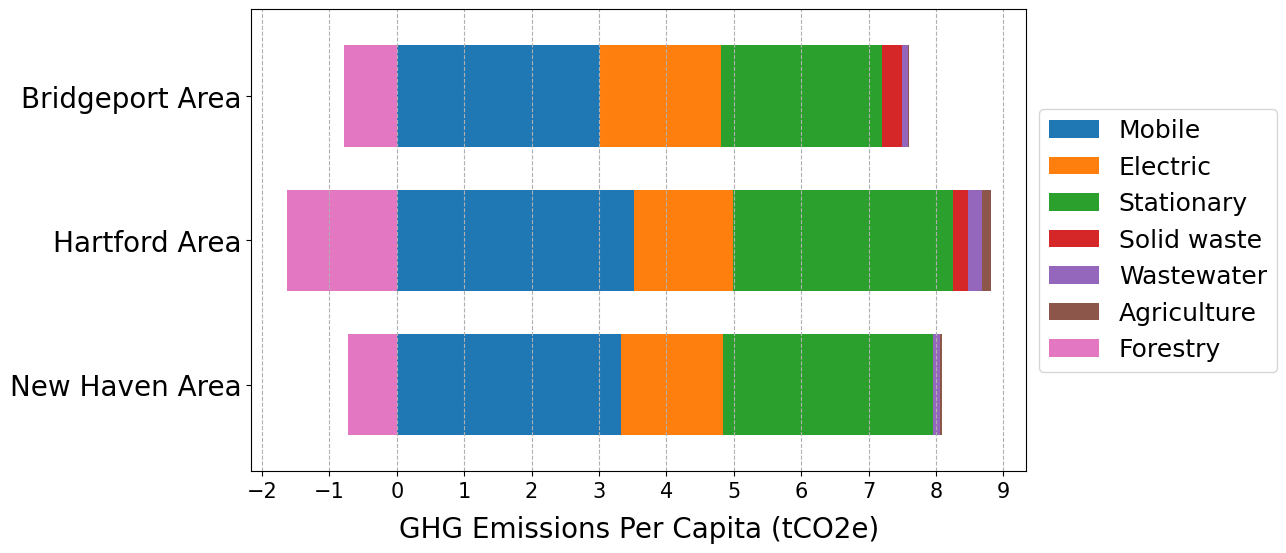

In [10]:
df1.set_index('MSA', inplace=True)
ax = df1.iloc[:,:-1].plot(kind='barh', stacked=True, figsize=(10, 6),width =0.7)
ax.set_xlabel('GHG Emissions Per Capita (tCO2e)', fontsize=20, labelpad=10)
ax.grid(axis='x', linestyle='--', alpha=1)

# Remove y-axis label
ax.set_ylabel('')

# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(-2, int(df.max().max()) + 2, 1))  # Adjust the interval (5 in this case)
ax.tick_params(axis='y', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/emissions-per-capita.png', dpi=600, bbox_inches='tight')

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Step three: Data visualization - subsector emissions</span>

In [11]:
# Assuming your DataFrame is named summary
df_new_haven = summary[(summary['MSA'] == 'New Haven-Milford') & (~summary['Sector'].str.contains('Forestry'))]
df_hartford = summary[(summary['MSA'] == 'Hartford-east Hartford-Middletown') & (~summary['Sector'].str.contains('Forestry'))]
df_bridgeport = summary[(summary['MSA'] == 'Bridgeport-Stamford-Norwalk') & (~summary['Sector'].str.contains('Forestry'))]

# Convert 'Total Emissions (MMTCO2e)' column to numeric, handling errors
df_new_haven['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven['Total Emissions (MMTCO2e)'], errors='coerce')
df_hartford['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford['Total Emissions (MMTCO2e)'], errors='coerce')
df_bridgeport['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_bridgeport['Total Emissions (MMTCO2e)'], errors='coerce')

# Get absolute values and calculate emissions percentage
total_new_haven = df_new_haven['Total Emissions (MMTCO2e)']
df_new_haven_sum = total_new_haven.sum()
df_new_haven['Emissions percentage (%)'] = df_new_haven['Total Emissions (MMTCO2e)'] / df_new_haven_sum * 100

total_hartford = df_hartford['Total Emissions (MMTCO2e)']
df_hartford_sum = total_hartford.sum()
df_hartford['Emissions percentage (%)'] = df_hartford['Total Emissions (MMTCO2e)'] / df_hartford_sum * 100

total_bridgeport = df_bridgeport['Total Emissions (MMTCO2e)']
df_bridgeport_sum = total_bridgeport.sum()
df_bridgeport['Emissions percentage (%)'] = df_bridgeport['Total Emissions (MMTCO2e)'] / df_bridgeport_sum * 100

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_6784\325147771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_haven['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven['Total Emissions (MMTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_6784\325147771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hartford['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford['Total Emissions (MMTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\ipykern

In [12]:
df_new_haven = summary[(summary['MSA'] == 'New Haven-Milford') & (~summary['Sector'].str.contains('Forestry'))]
df_hartford = summary[(summary['MSA'] == 'Hartford-east Hartford-Middletown') & (~summary['Sector'].str.contains('Forestry'))]
df_bridgeport = summary[(summary['MSA'] == 'Bridgeport-Stamford-Norwalk') & (~summary['Sector'].str.contains('Forestry'))]

# Convert 'Total Emissions (MMTCO2e)' column to numeric, handling errors
df_new_haven['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_new_haven['Emissions per capita (MTCO2e)'], errors='coerce')
df_hartford['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_hartford['Emissions per capita (MTCO2e)'], errors='coerce')
df_bridgeport['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_bridgeport['Emissions per capita (MTCO2e)'], errors='coerce')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_6784\3987737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_haven['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_new_haven['Emissions per capita (MTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_6784\3987737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hartford['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_hartford['Emissions per capita (MTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\

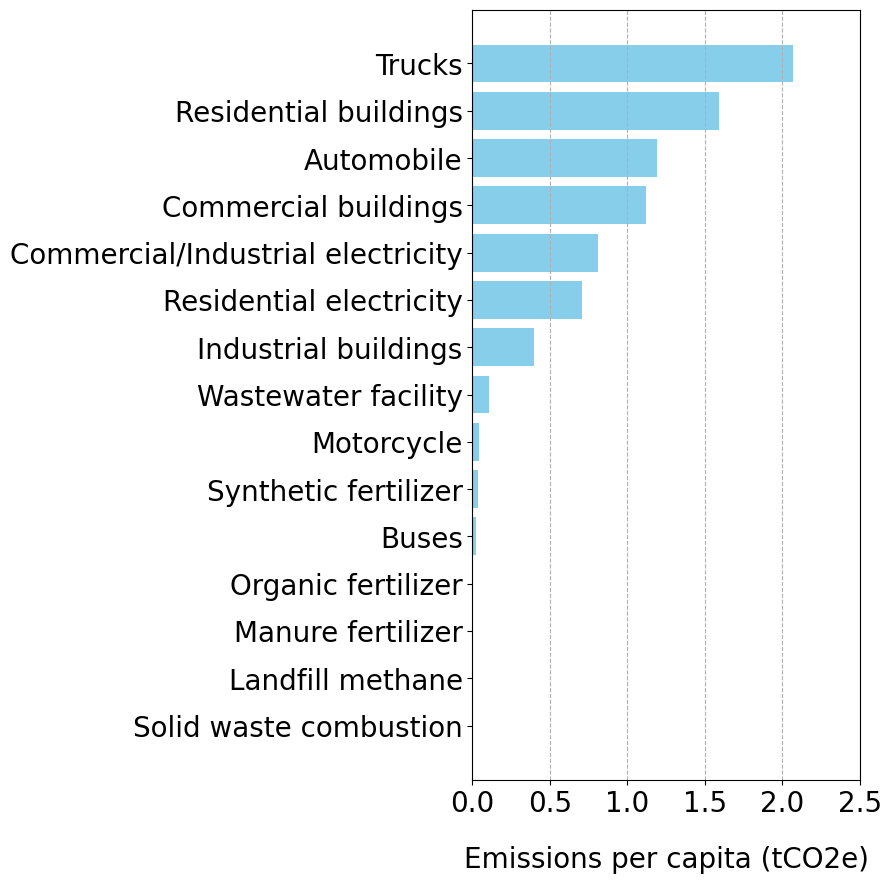

In [13]:
# Assuming df_new_haven_sorted is your DataFrame
df_new_haven_sorted = df_new_haven.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_new_haven_sorted['Subsector']
values = df_new_haven_sorted['Emissions per capita (MTCO2e)']

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot with sorted values and categories
ax.barh(categories, values, height=bar_widths, color='skyblue')
ax.set_xlabel('Emissions per capita (tCO2e)', color='black', fontsize=20)

ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.xaxis.labelpad = 20
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/newhaven-emissions-capita.png', dpi=600, bbox_inches='tight')
plt.show()

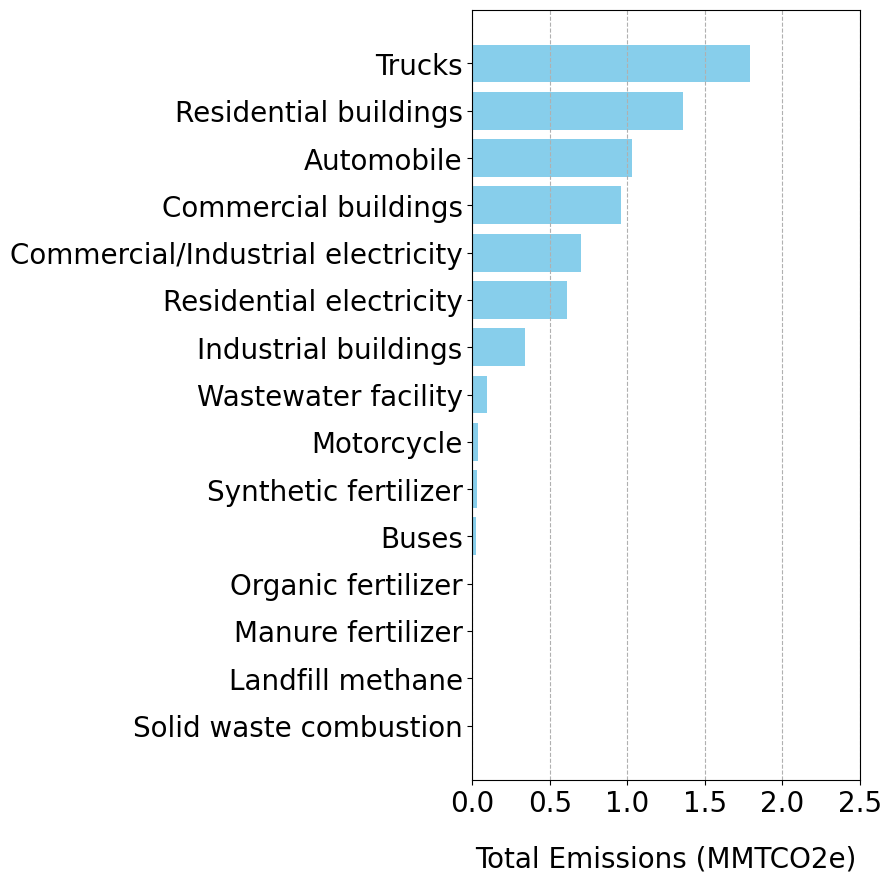

In [14]:
df_new_haven_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven_sorted['Total Emissions (MMTCO2e)'], errors='coerce')

# Assuming df_new_haven_sorted is your DataFrame
df_new_haven_sorted = df_new_haven.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_new_haven_sorted['Subsector']  # Reverse the order
values = df_new_haven_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
ax.barh(categories, values, height=bar_widths, color='skyblue')
ax.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.xaxis.labelpad = 20
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/newh-emissions-total.png', dpi=600, bbox_inches='tight')

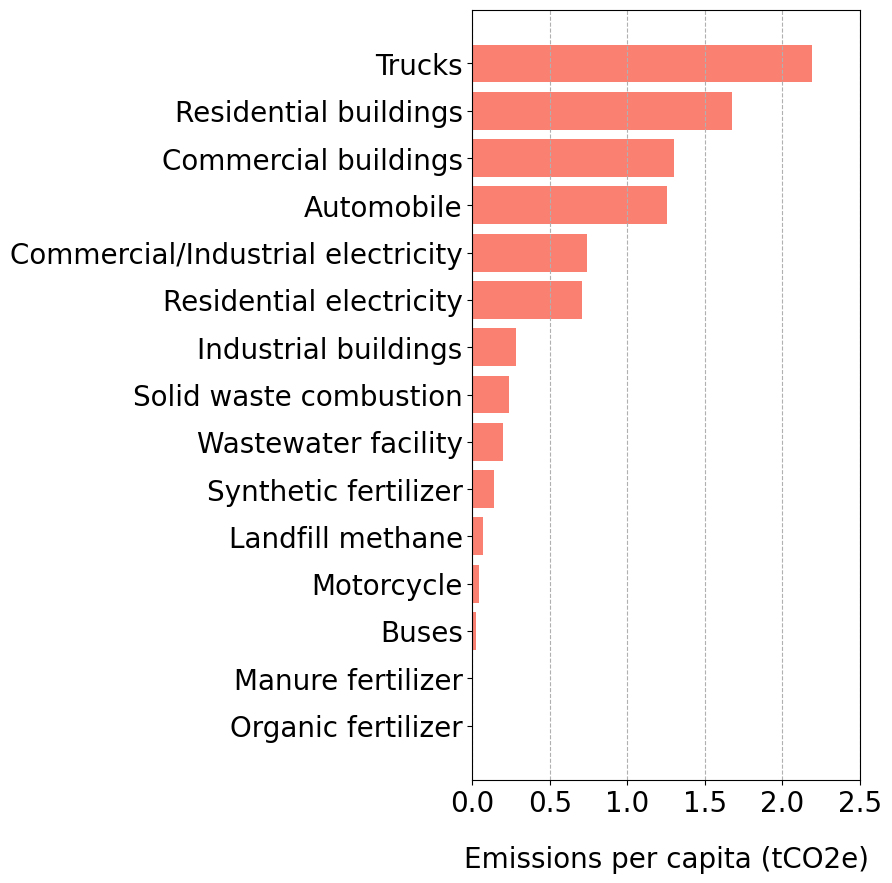

In [15]:
df_hartford_sorted = df_hartford.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_hartford_sorted['Subsector']
values = df_hartford_sorted['Emissions per capita (MTCO2e)']


fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Total Emissions (MMTCO2e)' values
bar_widths = 0.8

# Create the first bar plot
ax.barh(categories, values, height=bar_widths, color='salmon')
ax.set_xlabel('Emissions per capita (tCO2e)', color='black',fontsize=20)
ax.tick_params(axis='x', labelcolor='black',labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black',labelsize=20)
ax.xaxis.labelpad = 20  # You can adjust the value as needed
ax.set_xticks(np.arange(0, 3, 0.5)) 
# Set the x-tick label size
ax.tick_params(axis='y', labelcolor='black', labelsize=20)  # Adjust the labelsize as needed

# Show the plot
plt.savefig('../../../figures/Report-images/Hartford-emissions-per-capita.png', dpi=600, bbox_inches='tight')

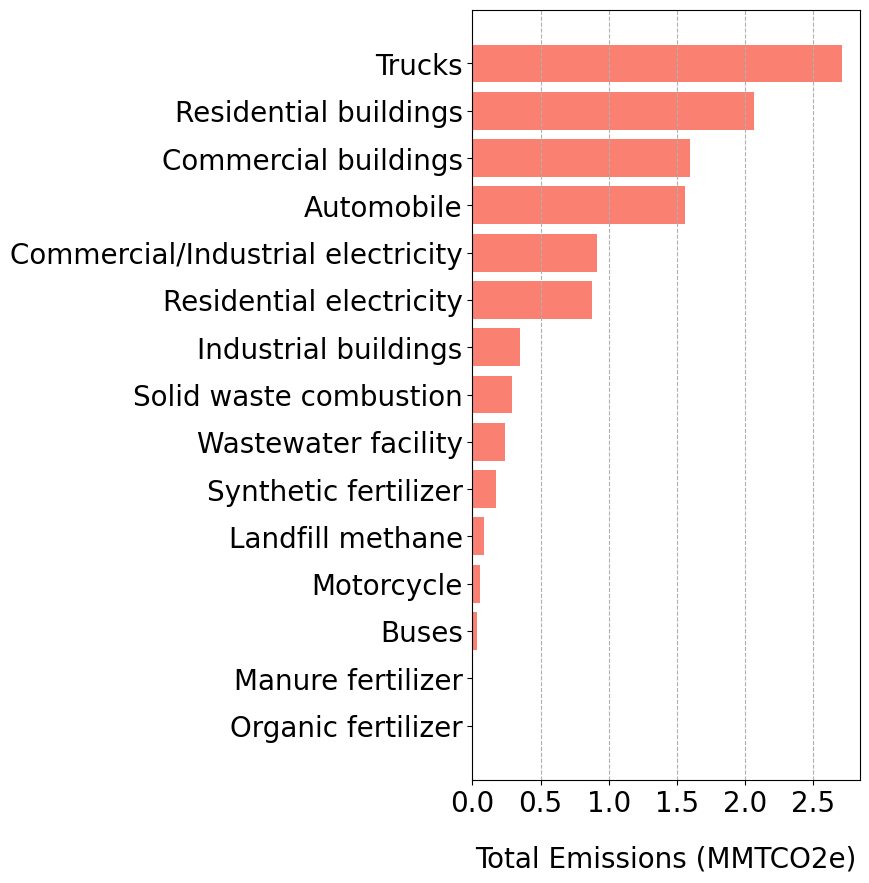

In [16]:
df_hartford_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford_sorted['Total Emissions (MMTCO2e)'], errors='coerce')

# Assuming df_new_haven_sorted is your DataFrame
df_hartford_sorted = df_hartford.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_hartford_sorted['Subsector']  # Reverse the order
values = df_hartford_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
ax.barh(categories, values, height=bar_widths, color='salmon')
ax.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.xaxis.labelpad = 20
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/hartford-emissions-total.png', dpi=600, bbox_inches='tight')

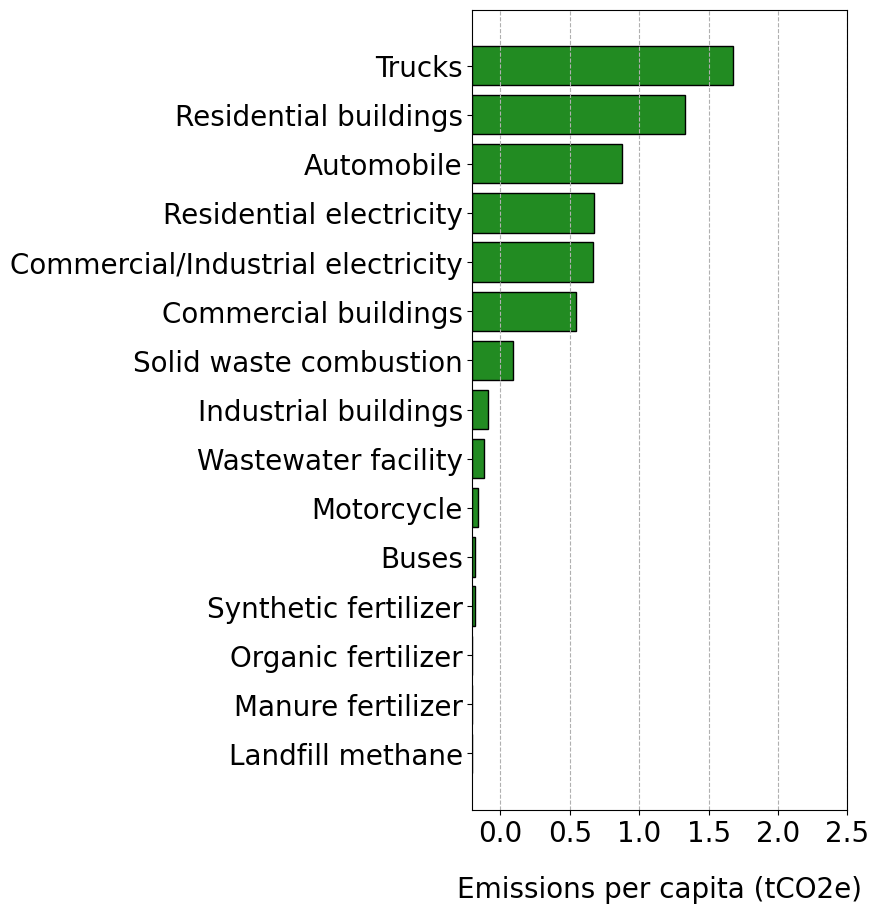

In [17]:
df_bridgeport_sorted = df_bridgeport.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_bridgeport_sorted['Subsector']
values = df_bridgeport_sorted['Emissions per capita (MTCO2e)']


fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Total Emissions (MMTCO2e)' values
bar_widths = 0.8

# Create the first bar plot
ax.barh(categories, values, height=bar_widths, color='forestgreen', edgecolor='black', left=-0.2)
ax.set_xlabel('Emissions per capita (tCO2e)', color='black',fontsize=20)
ax.tick_params(axis='x', labelcolor='black',labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black',labelsize=20)
ax.xaxis.labelpad = 20  # You can adjust the value as needed
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)  # Adjust the labelsize as needed

# Manually adjust subplots and margins to reduce white space
plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.1)
# Show the plot
plt.savefig('../../../figures/Report-images/bridgeport-emissions-per-capita.png', dpi=600, bbox_inches='tight')

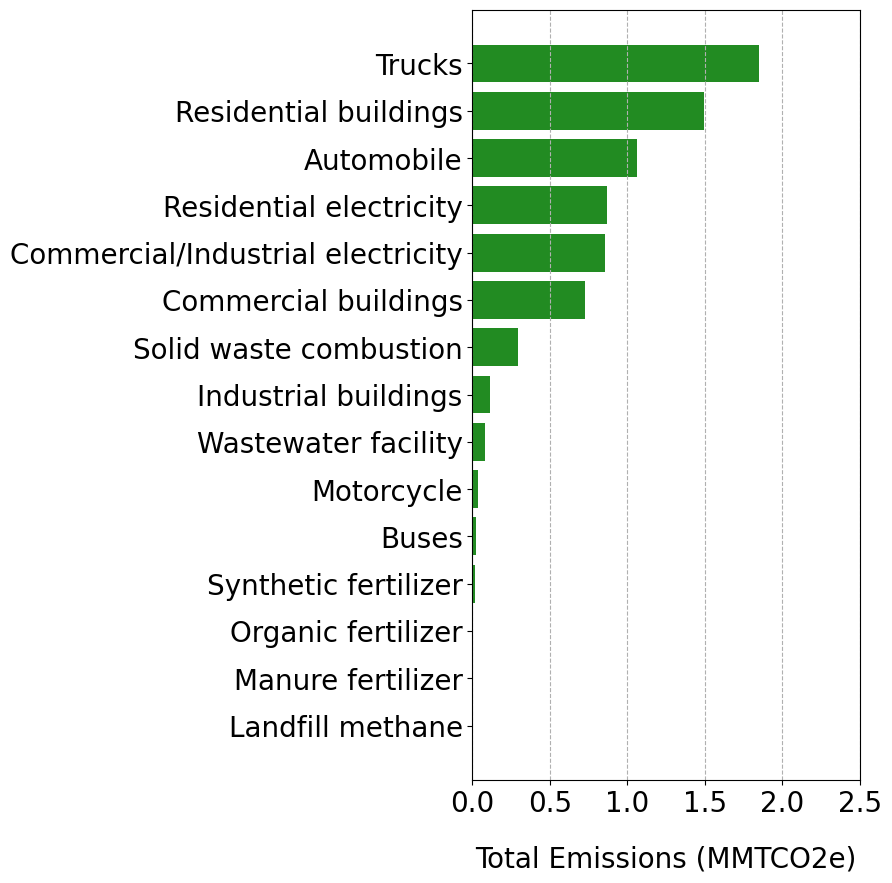

In [18]:
df_bridgeport_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_bridgeport_sorted['Total Emissions (MMTCO2e)'], errors='coerce')

# Assuming df_new_haven_sorted is your DataFrame
df_bridgeport_sorted = df_bridgeport.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_bridgeport_sorted['Subsector']  # Reverse the order
values = df_bridgeport_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
ax.barh(categories, values, height=bar_widths, color='forestgreen')
ax.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.xaxis.labelpad = 20
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/bridgeport-emissions-total.png', dpi=600, bbox_inches='tight')

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Step four: Table summary for sector emissions</span>

In [19]:
mobile = pd.read_csv('../../../results/Mobile-combustion-emissions.csv')
mobile = mobile['GHG Emissions(MMTCO2e)']
electric = pd.read_csv('../../../results/2021-Electricity-consumption-emissions.csv')
electric = electric['Total Emissions (MMTCO2e)']
residential_breakdowm = pd.read_csv('../../../results/residential-emissions-breakdown-fuel.csv')
residential_oil = residential_breakdowm.iloc[2,1:][::-1].reset_index(drop=True).astype(float)
residential_propane = residential_breakdowm.iloc[1,1:][::-1].reset_index(drop=True).astype(float)
residential_natural = residential_breakdowm.iloc[0,1:][::-1].reset_index(drop=True).astype(float)
residential = residential_oil+residential_propane+residential_natural
commercial = summary.loc[28:30,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential_oil+residential_propane+residential_natural+commercial+industrial
solid_waste_combustion = summary.loc[19:21,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
solid_waste_landfills = summary.loc[22:24,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
solid_waste = solid_waste_combustion+solid_waste_landfills
agriculture = pd.read_csv('../../../results/agriculture-emissions.csv')
agriculture = agriculture['GHG Emissions (MMTCO2e)']
wastewater = summary.loc[43:45,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('../../../results/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)

In [20]:
#create a summary table for all the emissions
# Creating a sample DataFrame
data = {
    'MSA': ['New Haven-Milford', 'Hartford-east Hartford-Middletown', 'Bridgeport-Stamford-Norwalk'],
    'Mobile Combustion': mobile,
    'Electric Power Consumption': electric,
    'Solid Waste': solid_waste,
    'Residential Building': residential,
    'Commercial Building': commercial,
    'Industrial Facility': industrial,
    'Agriculture & land management': agriculture,
    'Wastewater treatment': wastewater,
    'Urban forestry': forest,
}

df = pd.DataFrame(data)

# Display the created DataFrame

df.set_index('MSA', inplace=True)
df_transposed = df.transpose()
df_transposed

# Sum the entire column
column_sums = df_transposed.sum()

# Add a new row at the bottom with column-wise sums
df_transposed.loc['Total'] = column_sums

df_transposed.index = [index + " (MMTCO2e)" for index in df_transposed.index]
df_transposed.to_csv('../../../results/sector-emissions.csv')

In [21]:
df_transposed

MSA,New Haven-Milford,Hartford-east Hartford-Middletown,Bridgeport-Stamford-Norwalk
Mobile Combustion (MMTCO2e),2.875389,4.355344,2.968949
Electric Power Consumption (MMTCO2e),1.314940,1.790219,1.719647
Solid Waste (MMTCO2e),0.000000,0.377019,0.290551
Residential Building (MMTCO2e),1.361021,2.064354,1.492142
Commercial Building (MMTCO2e),0.955882,1.600473,0.727635
Industrial Facility (MMTCO2e),0.339402,0.347809,0.109909
Agriculture & land management (MMTCO2e),0.029241,0.170435,0.014407
Wastewater treatment (MMTCO2e),0.092857,0.242241,0.084019
Urban forestry (MMTCO2e),-0.627891,-1.983747,-0.737232
Total (MMTCO2e),6.340842,8.964147,6.670027
